# Exploring AirBnB in Athens - Panagiotis-Alexios Spanakis Assignment 1

### Before we start our analysis, we need to download (if we don't have them already) and import the libraries we will use in this notebook.

We will use the following libraries:

* `pandas` for data manipulation and analysis
* `numpy` for mathematical operations
* `matplotlib` and `seaborn` for data visualization
* `folium` for creating interactive maps
* `geopandas` for loading the GeoJSON file (for the map) which contains the boundaries of the neighbourhoods in Athens and creating the convex hull
* `datetime` for working with dates

Note: These libraries can be installed from the command line with the command `pip install <library_name>`.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
# We need to import geopandas as well, as we will use it to load the GeoJSON file (for the map)
import geopandas as gpd
# Specifically we want to get today's date for the 8th objective, so we import the datetime module from the datetime library
from datetime import datetime

### Then, we need to load the data we will use.

As we will see, we will need only some of the columns from some files of the data, so we will load only those columns.

We will use the following columns from the `listings.csv` file:

* `id`: the id of the listing
* `name`: the name of the listing
* `host_id`: the id of the host
* `host_name`: the name of the host
* `neighbourhood_cleansed`: the neighbourhood of the listing in a more standardized format
* `latitude`: the latitude of the listing
* `longitude`: the longitude of the listing
* `room_type`: the type of the room
* `price`: the price of the listing
* `number_of_reviews`: the number of reviews the listing has
* `reviews_per_month`: the number of reviews per month the listing has

We will use the following columns from the `calendar.csv` file:

* `listing_id`: the id of the listing
* `date`: the date
* `available`: whether the listing is available or not
* `price`: the price of the listing
* `adjusted_price`: the adjusted price of the listing

Lastly, we will use the `neighbourhoods.geojson` file to get the boundaries of the neighbourhoods in Athens.

In [2]:
# Load the listings data and select the columns we will use
listings = pd.read_csv('data/listings.csv')[['id', 'name', 'host_id', 'host_name',
                                             'neighbourhood_cleansed', 'latitude', 'longitude', 'room_type', 'price',
                                             'number_of_reviews', 'reviews_per_month'
                                             ]]

# Load the calendar data and select the columns we will use
calendar = pd.read_csv('data/calendar.csv')[[
    'listing_id', 'date', 'available', 'price', 'adjusted_price'
]]

# Load the neighbourhoods GeoJSON file
neighbourhoods_gdf = gpd.read_file("data/neighbourhoods.geojson")

### Let's see how the listings data looks like.

In [3]:
listings.head()

,id,name,host_id,host_name,neighbourhood_cleansed,latitude,longitude,room_type,price,number_of_reviews,reviews_per_month
0,10595,Condo in Athens · ★4.83 · 3 bedrooms · 5 beds ...,37177,Emmanouil,ΑΜΠΕΛΟΚΗΠΟΙ,37.98863,23.76527,Entire home/apt,$144.00,42,0.28
1,10990,Rental unit in Athens · ★4.80 · 1 bedroom · 1 ...,37177,Emmanouil,ΑΜΠΕΛΟΚΗΠΟΙ,37.98903,23.76448,Entire home/apt,$70.00,66,0.49
2,10993,Rental unit in Athens · ★4.84 · Studio · 2 bed...,37177,Emmanouil,ΑΜΠΕΛΟΚΗΠΟΙ,37.98888,23.76473,Entire home/apt,$85.00,92,0.69
3,10995,Rental unit in Athens · ★4.80 · 1 bedroom · 2 ...,37177,Emmanouil,ΑΜΠΕΛΟΚΗΠΟΙ,37.98903,23.76448,Entire home/apt,$60.00,30,0.19
4,724485,Rental unit in Athens · ★4.80 · 1 bedroom · 1 ...,3745284,Elpidoforos,ΜΟΥΣΕΙΟ-ΕΞΑΡΧΕΙΑ-ΝΕΑΠΟΛΗ,37.98985,23.73779,Entire home/apt,$35.00,514,3.87


### We can see that the price column is not in the correct format. Let's fix that.

In [4]:
# Convert the 'price' column to numerical format by removing the '$' sign and commas, and converting it to float
listings['price'] = listings['price'].str.replace('$', '', regex=False).str.replace(',', '', regex=False).astype(float)

### Now let's see how the listings data looks like after the price column has been fixed.

In [5]:
listings['price'].head()

0    144.0
1     70.0
2     85.0
3     60.0
4     35.0
Name: price, dtype: float64

### Now let's see how the calendar data looks like.

In [6]:
calendar.head()

,listing_id,date,available,price,adjusted_price
0,10595,2023-09-21,f,$150.00,$60.00
1,10595,2023-09-22,t,$150.00,$60.00
2,10595,2023-09-23,t,$150.00,$75.00
3,10595,2023-09-24,t,$150.00,$90.00
4,10595,2023-09-25,f,$300.00,$210.00


### The date column is not by default in the correct format. Let's fix that.

In [7]:
# Convert the date column to datetime format
calendar['date'] = pd.to_datetime(calendar['date'])

### We can also observe that the price columns are not in the correct format. Let's fix that.

In [8]:
# Remove the $ sign and commas from the price columns and convert them to float
calendar['price'] = calendar['price'].str.replace('$', '').str.replace(',', '').astype(float)
calendar['adjusted_price'] = calendar['adjusted_price'].str.replace('$', '').str.replace(',', '').astype(float)

### Now that we have all the data we need in the correct format, we can start our analysis.

**Note** : The numeric results are rounded to 3 decimal places for better readability.


---

## (1) Neighbourhood Listings in Descending Order

In order to find the most popular neighbourhoods in Athens, we will use the `neighbourhood_cleansed` column as it has the neighbourhoods in a more standardized format. 
We will group the listings by neighbourhood and count the number of listings in each neighbourhood. We will then sort the neighbourhoods in descending order.

In [9]:
# Count the number of listings per neighbourhood
neighbourhood_counts = listings['neighbourhood_cleansed'].value_counts() # The value_counts() method sorts the values in descending order by default

# Display the sorted neighbourhood counts, since the neighbourhoods are already sorted in descending order
neighbourhood_counts

neighbourhood_cleansed
ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ              2416
ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ                 1122
ΝΕΟΣ ΚΟΣΜΟΣ                          980
ΜΟΥΣΕΙΟ-ΕΞΑΡΧΕΙΑ-ΝΕΑΠΟΛΗ             979
ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ     817
ΠΛΑΤΕΙΑ ΑΤΤΙΚΗΣ                      583
ΠΑΓΚΡΑΤΙ                             511
ΑΜΠΕΛΟΚΗΠΟΙ                          452
ΚΟΛΩΝΑΚΙ                             425
ΘΗΣΕΙΟ                               386
ΑΚΡΟΠΟΛΗ                             386
ΠΕΤΡΑΛΩΝΑ                            352
ΚΕΡΑΜΕΙΚΟΣ                           343
ΚΥΨΕΛΗ                               271
ΣΤΑΔΙΟ                               252
ΓΟΥΔΙ                                230
ΙΛΙΣΙΑ                               216
ΠΛΑΤΕΙΑ ΑΜΕΡΙΚΗΣ                     180
ΝΙΡΒΑΝΑ                              174
ΠΑΤΗΣΙΑ                              166
ΛΥΚΑΒΗΤΤΟΣ                           162
ΖΑΠΠΕΙΟ                              161
ΑΝΩ ΚΥΨΕΛΗ                           119
ΓΚΥΖΗ                             

## (2) Neighbourhood Prices in Descending Order

We want a table with the prices per neighbourhood. The prices information will contain:

* median price per neighbourhood

* mean price per neighbourhood

* standard deviation per neighbourhood

* number of listings per neighbourhood.

The contents of the table should be in descending median prices.

In order to find the most expensive neighbourhoods in Athens, we will use the `neighbourhood_cleansed` column again

In [10]:
# Group the data by 'neighbourhood' and calculate the required statistics and round them to 3 decimal places
neighbourhood_price_stats = listings.groupby('neighbourhood_cleansed')['price'].agg(
    median_price='median',
    mean_price='mean',
    std_dev='std',
    num_listings='count'
).round(3)

# Sort the table by median price in descending order
neighbourhood_stats_sorted = neighbourhood_price_stats.sort_values(by='median_price', ascending=False)

# Display the sorted table
neighbourhood_stats_sorted

,median_price,mean_price,std_dev,num_listings
neighbourhood_cleansed,,,,
ΡΗΓΙΛΛΗΣ,120.0,367.800,578.623,5
ΖΑΠΠΕΙΟ,114.0,224.068,641.163,161
ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ,104.0,140.651,229.183,2416
ΑΚΡΟΠΟΛΗ,100.0,195.345,703.322,386
ΚΟΛΩΝΑΚΙ,100.0,128.595,104.431,425
ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ,90.5,120.284,104.614,1122
ΘΗΣΕΙΟ,90.0,126.492,124.177,386
ΚΕΡΑΜΕΙΚΟΣ,89.0,123.883,136.367,343
ΛΥΚΑΒΗΤΤΟΣ,75.0,104.562,87.860,162


## Important Observations on the Price Data

---

We can observe that the prices are highly skewed and this is obvious from the standard deviation values,
which are very high, showing that the distribution is highly skewed, especially for the neighbourhood `ΜΟΥΣΕΙΟ-ΕΞΑΡΧΕΙΑ-ΝΕΑΠΟΛΗ` where the standard deviation is `2563.622`.

Let's see some statistics for the prices, to better understand the distribution of the prices.

In [11]:
# Display some statistics for the prices
listings['price'].describe().round(3)

count    12955.000
mean       110.459
std        738.186
min         10.000
25%         50.000
50%         71.000
75%        113.000
max      80275.000
Name: price, dtype: float64

In [12]:
# Show also the median price and the 90th percentile
print('Median Price: {:.3f}'.format(listings['price'].median()))
print('90th Percentile: {:.3f}'.format(listings['price'].quantile(0.9)))

Median Price: 71.000
90th Percentile: 180.000


It is obvious that the distribution is highly skewed, with a few listings having a very high price and most listings having a low price (`<100`).
Also,we can see that the standard deviation is `738.186`, which is a very high value, showing that the distribution is highly skewed.
Also, the maximum price is `80275`, which is a very high value and far bigger than the median price (`71`).

Now, let's see the distribution of the prices in a boxplot, to better visualize the distribution.
The boxplot is a standardized way of displaying the distribution of data based on a five number summary (`minimum`, first quartile (`Q1`), median (`Q2`), third quartile (`Q3`), and `maximum`).

<Figure size 1000x600 with 0 Axes>

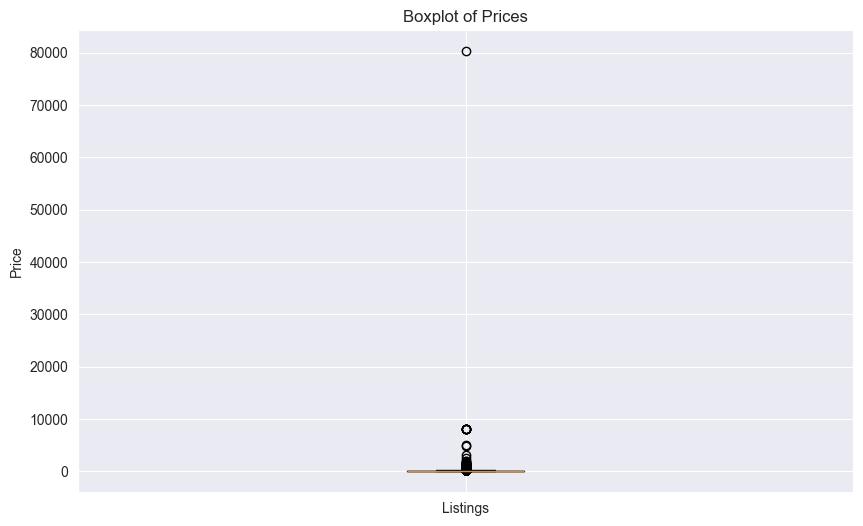

In [13]:
# Create the boxplot of the prices
plt.figure(figsize=(10, 6))
# Display the boxplot 
plt.figure(figsize=(10, 6))
plt.boxplot(listings['price'])
plt.title('Boxplot of Prices')
plt.ylabel('Price')
plt.xticks([1], ['Listings'])
plt.show()

We can see now that the distribution is highly skewed as we expected.
Those listings that range from 2000 and above are probably luxury listings and therefore extreme outliers.

To get such outliers, we will use the Z-score method. 
**More specifically**, the Z-score is a measure of how many standard deviations an individual data point is from the mean of a distribution.

We will calculate the Z-score for each listing and if the absolute Z-score is greater than 3 
(which means that the listing is 3 standard deviations away from the mean),
we will consider the listing as an outlier, and we will remove it from the data.

In [14]:
# Calculate the Z-score for each listing
z_scores_listings = np.abs((listings['price'] - listings['price'].mean()) / listings['price'].std(ddof=0))
# The ddof=0 parameter indicates that the population standard deviation shall be used instead of the sample standard deviation
# which in this case is more appropriate

# If the Z-score is greater than 3, then the listing is an outlier
outliers_listings = z_scores_listings > 3

# We will remove the outliers and place the new values in a new dataframe called 'listings_no_outliers'
listings_no_outliers = listings[~outliers_listings]

# Display the first few rows of the new dataframe
listings_no_outliers.sort_values(by='price', ascending=False).head()

,id,name,host_id,host_name,neighbourhood_cleansed,latitude,longitude,room_type,price,number_of_reviews,reviews_per_month
4894,39476638,Rental unit in Athina · 2 bedrooms · 2 beds · ...,260828371,Christos,ΚΕΡΑΜΕΙΚΟΣ,37.980860,23.715450,Entire home/apt,2000.0,0,NaN
5246,41556060,Condo in Athina · ★5.0 · 9 bedrooms · 9 beds ·...,248886067,Vasileios,ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ,37.975410,23.727620,Entire home/apt,1980.0,4,0.15
9967,807721368332995934,Hotel in Athina · 6 bedrooms · 13 beds · 6 baths,331327165,Markos,ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ,37.978827,23.729676,Private room,1702.0,0,NaN
2868,28042027,Aparthotel in Athens · ★5.0 · 6 bedrooms · 9 b...,206838334,Stratos,ΘΗΣΕΙΟ,37.978030,23.722840,Entire home/apt,1649.0,15,0.27
8595,672293681430475973,Condo in Athina · ★5.0 · 2 bedrooms · 3 beds ·...,469788883,Andreas,ΠΕΤΡΑΛΩΝΑ,37.971042,23.708681,Entire home/apt,1500.0,4,0.28


#### Let's now display the new boxplot of the prices.

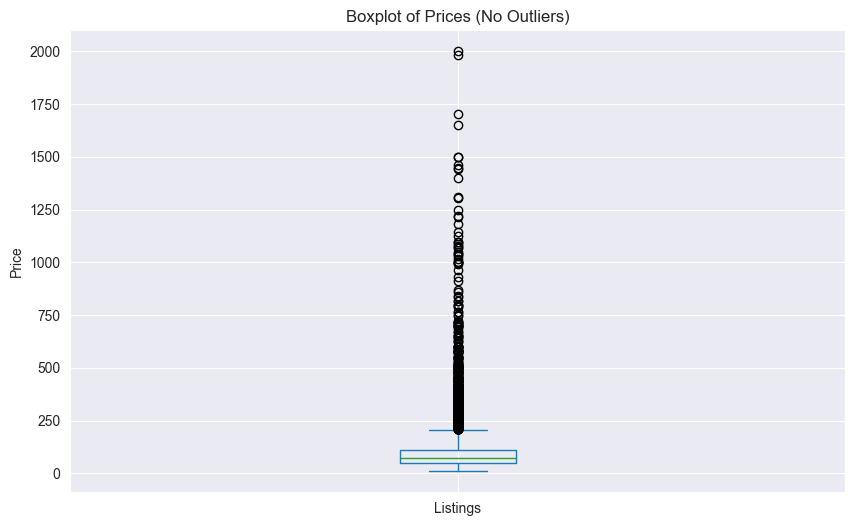

In [15]:
# Create the boxplot of the new prices
listings_no_outliers['price'].plot(kind='box', figsize=(10, 6))
plt.title('Boxplot of Prices (No Outliers)')
plt.ylabel('Price')
plt.xticks([1], ['Listings'])
plt.show()

We can see that the distribution is still highly skewed, but the extreme outliers are now removed and the distribution is more readable.

### Important Note about the Calendar Data

The same observation can be done for the `price` and `adjusted_price` column, which we can be seen from these statistics:

In [16]:
# Display some statistics for the 'price' column
calendar['price'].describe().round(3)

count    4728229.000
mean         141.852
std          799.494
min            0.000
25%           50.000
50%           71.000
75%          117.000
max        85140.000
Name: price, dtype: float64

In [17]:
# Display some statistics for the 'adjusted_price' column
calendar['adjusted_price'].describe().round(3)

count    4728229.000
mean         138.429
std          744.826
min            0.000
25%           50.000
50%           71.000
75%          115.000
max        85140.000
Name: adjusted_price, dtype: float64

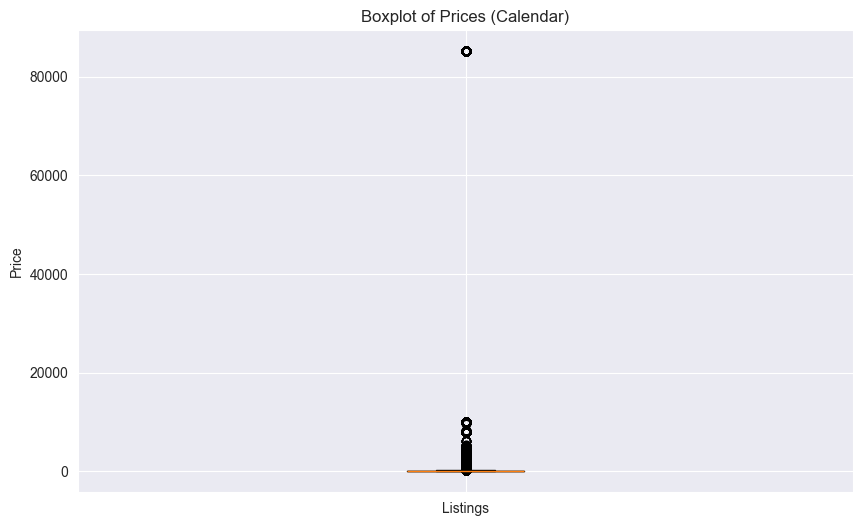

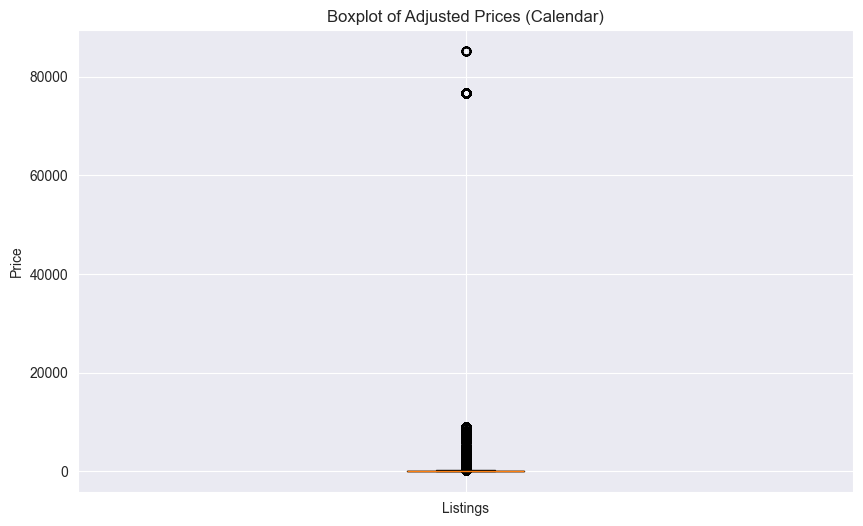

In [18]:
# Create the boxplot of the prices
plt.figure(figsize=(10, 6))
# Display the boxplot
plt.boxplot(calendar['price'])
plt.title('Boxplot of Prices (Calendar)')
plt.ylabel('Price')
plt.xticks([1], ['Listings'])
plt.show()

# Create the boxplot of the adjusted prices
plt.figure(figsize=(10, 6))
# Display the boxplot
plt.boxplot(calendar['adjusted_price'])
plt.title('Boxplot of Adjusted Prices (Calendar)')
plt.ylabel('Price')
plt.xticks([1], ['Listings'])
plt.show()

As we can see from the statistics and the boxplots, the distributions are highly skewed, with a few listings having a very high price and most listings having a low price as before.

We again proceed with the Z-score method to remove the outliers from these dataframes as well.

In [19]:
# Calculate the Z-score for each listing as before
z_scores_calendar = np.abs((calendar['price'] - calendar['price'].mean()) / calendar['price'].std(ddof=0))
# Same for the adjusted price
z_scores_calendar_adjusted = np.abs(
    (calendar['adjusted_price'] - calendar['adjusted_price'].mean()) / calendar['adjusted_price'].std(ddof=0))

# If the Z-score is greater than 3, then the listing is an outlier
outliers_calendar = z_scores_calendar > 3
outliers_calendar_adjusted = z_scores_calendar_adjusted > 3

# We will remove the outliers and save the new values in new dataframes
calendar_no_outliers = calendar[~outliers_calendar]
calendar_adj_no_outliers = calendar[~outliers_calendar_adjusted]

Now that we have fixed the outliers, and saved the new values in `listings_no_outliers` ,`calendar_no_outliers` and `calendar_adj_no_outliers`,
we can continue with our analysis.

## (3) Availability per Day

We want a plot with the number of listings available per day, on the $y$ axis, and the date, on the $x$ axis.

To make the plot, we will use the `calendar` data. We will first filter the data to only include available listings (where `available` is `t`). We will then group the data by the `date` column and count the number of listings available for each date. Finally, we will create the plot.

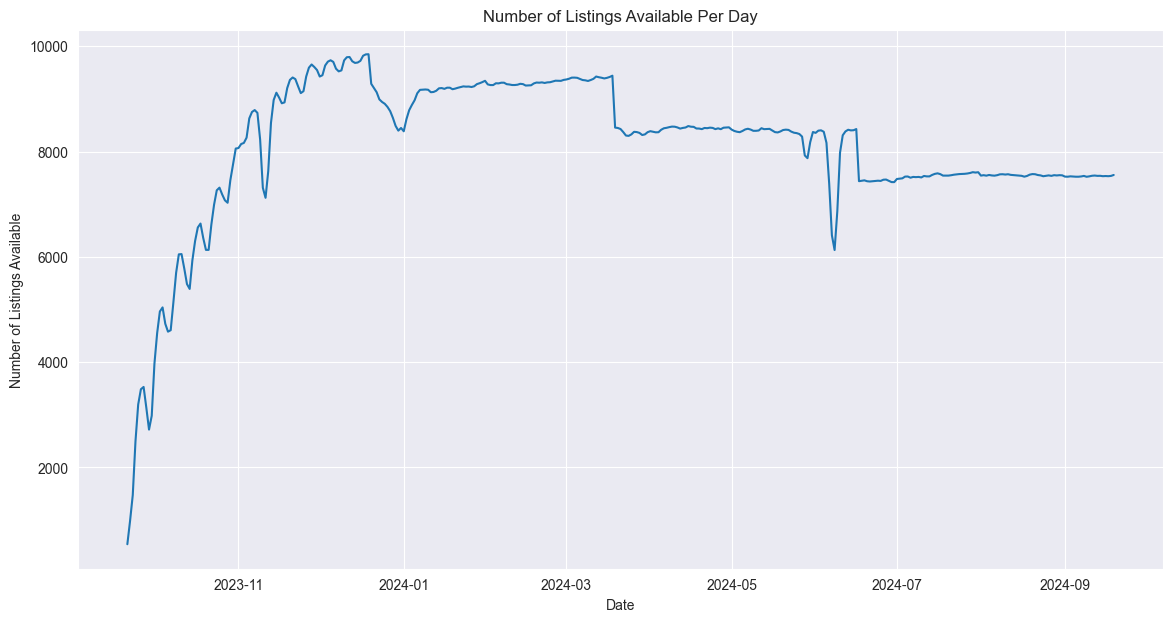

In [20]:
# Filter the data to only include available listings (where 'available' is 't')
calendar_available = calendar[calendar['available'] == 't']

# Group the data by the 'date' column and count the number of listings available for each date
availability_per_day = calendar_available.groupby('date')['listing_id'].count()

# Create the plot
plt.figure(figsize=(14, 7))
# We use a line plot as it is more appropriate for this case
sns.lineplot(x=availability_per_day.index, y=availability_per_day.values)
# Set the x-axis to display the dates in a readable format
plt.xlabel('Date')
plt.ylabel('Number of Listings Available')
plt.title('Number of Listings Available Per Day')
plt.grid(True)
plt.show()

## (4) Reviews, Occupancy per Listing, Average Income

We will create a histogram showing the number of reviews per listing. The histogram will bin the number of reviews, from the smallest amount of reviews in a listing, to the maximum number of reviews in a listing rounded up to the closest hundred.

Once we have done that, we will calculate the average occupancy per listing per month. To calculate that, we will find the average reviews per month and assume that half of the bookings result in reviews.

Then, assuming that each booking is for a three nights stay, we will calculate the average income per month, using the average price charged throughout all listings.

### First, we will create the histogram showing the number of reviews per listing.

We will bin the number of reviews, from the smallest amount of reviews in a listing, to the maximum number of reviews in a listing rounded up to the closest hundred
and arrange the bins 100 reviews apart and then create the histogram.

**Note**: We will plot the histogram in logarithmic scale, as the distribution is highly skewed, so the logarithmic scale will make the distribution more readable.

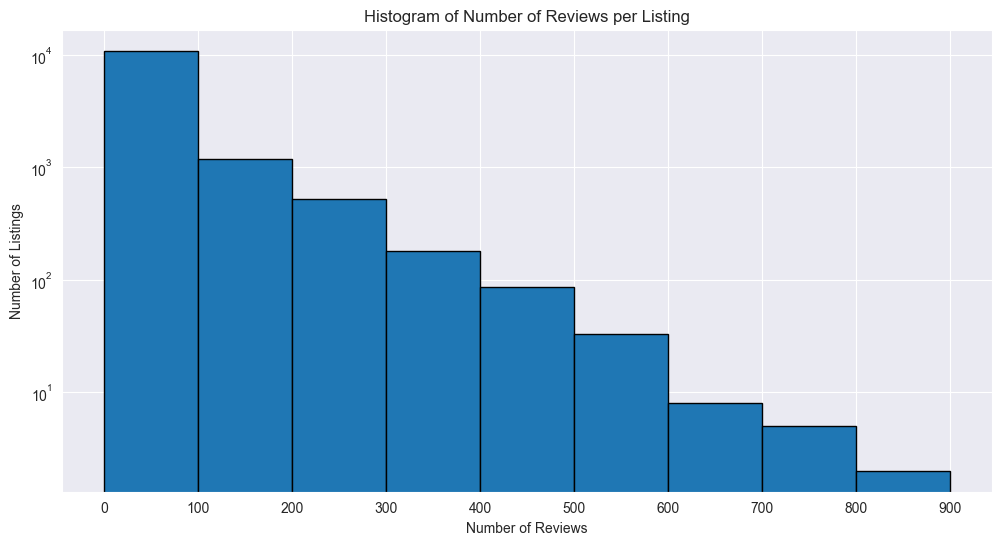

In [21]:
# Extract the 'number_of_reviews' column from the listings dataframe
reviews_data = listings['number_of_reviews']

# Calculate the maximum number of reviews rounded up to the closest hundred
max_reviews = np.ceil(reviews_data.max() / 100) * 100

# Create bins from the smallest amount of reviews to the maximum rounded up to the closest hundred, each bin spaced 100 reviews apart
bins = np.arange(0, max_reviews + 1, 100)

# Create the histogram
plt.figure(figsize=(12, 6))
# We use the logarithmic scale as the distribution is highly skewed, so the logarithmic scale will make the distribution more readable
plt.hist(reviews_data, bins=bins, edgecolor='black', log=True)
plt.title('Histogram of Number of Reviews per Listing')
plt.xlabel('Number of Reviews')
plt.xticks(bins)
plt.ylabel('Number of Listings')
plt.grid(True)
plt.show()

It's clear that most listings have a small number of reviews (less than 100), with only a few listings having a large number of reviews (more than 600).

### Second, we will calculate the average occupancy per listing per month.

We will find the average reviews per month and assume that half of the bookings result in reviews. 
Then, we will calculate the average occupancy per listing per month.

**Note**: We make the assumption that the `Nan` values of the reviews per month column are equal to 0, as they can distort the average calculation, and we want to take into account the listings that have no reviews.

We could also drop these values from the dataframe, and we would get the average occupancy to be `3.592`.

In [22]:
# Extract the 'reviews_per_month' column from the listings dataframe
reviews_per_month_data = listings['reviews_per_month']

# Make Nan values equal to 0 as they can distort the average calculation, and we want to take 
# into account the listings that have no reviews
reviews_per_month_data = reviews_per_month_data.fillna(0)

# Assume that half of the bookings result in reviews, so double the 'reviews_per_month' to get estimated bookings per month
estimated_bookings_per_month = reviews_per_month_data * 2

# Calculate the average of these estimated bookings to get the average occupancy per listing per month
average_occupancy_per_listing_per_month = estimated_bookings_per_month.mean()
print('Average Occupancy per Listing per Month: {:.3f}'.format(average_occupancy_per_listing_per_month))

Average Occupancy per Listing per Month: 3.049


### Finally, we will calculate the average income per month.

We will do it with 3 different ways (choices of price columns):

* First, we will calculate the average income per month using the `price` column from `listings`
* Second, we will calculate the average income per month using the `price` column from `calendar`
* Lastly, we will calculate the average income per month using the `adjusted_price` column from `calendar`, which maybe is more accurate in some cases.

**Important Note**: In this case, because we want our results to not be skewed by the outliers, 
we will use the `listings_no_outliers`, `calendar_no_outliers`,`calendar_adj_no_outliers`  dataframes, 
which have the outliers removed according to the Z-score method, 
so that the results are more accurate and representative of the data. These dataframes were created in the **Important Observation** section of the 2nd objective.

In [23]:
#(1) Calculate the average price charged throughout all listings (with the outliers removed), using the 'price' column from listings
avg_price = listings_no_outliers['price'].mean()

# Calculate the average income per month assuming each booking is for a three nights stay
avg_income_per_month = avg_price * average_occupancy_per_listing_per_month * 3

print('Average Income per Month (Listing_Price): {:.3f}'.format(avg_income_per_month))

Average Income per Month (Listing_Price): 904.193


In [24]:
#(2) Calculate the average price charged throughout all listings (with the outliers removed), using the 'price' column from calendar
avg_price_calendar = calendar_no_outliers['price'].mean()

# Calculate the average income per month assuming each booking is for a three nights stay
avg_income_per_month_calendar = avg_price_calendar * average_occupancy_per_listing_per_month * 3

print('Average Income per Month (Calendar_Price): {:.3f}'.format(avg_income_per_month_calendar))

Average Income per Month (Calendar_Price): 919.422


In [25]:
#(3) Calculate the average income per month using the 'adjusted_price' column from calendar
avg_price_calendar = calendar_adj_no_outliers['adjusted_price'].mean()

# Calculate the average income per month assuming each booking is for a three nights stay
avg_income_per_month_calendar = avg_price_calendar * average_occupancy_per_listing_per_month * 3

print('Average Income per Month (Adjusted_Calendar_Price): {:.3f}'.format(avg_income_per_month_calendar))

Average Income per Month (Adjusted_Calendar_Price): 907.497


## (5) Listings per Room Type

We want to show the number of listings per room type, in absolute numbers, and also in percentages (the percentage of listings for each particular room type).
Then, to show the number of listings per neighbourhood and room type.

### First, we will show the number of listings per room type, in absolute numbers, and also in percentages.

In [26]:
# Count the number of listings per room type
room_type_counts = listings['room_type'].value_counts()
room_type_counts

room_type
Entire home/apt    11652
Private room        1113
Hotel room           105
Shared room           85
Name: count, dtype: int64

In [27]:
# Count the number of listings per room type as a percentage of the total number of listings
room_type_counts_percentages = room_type_counts / room_type_counts.sum() * 100
room_type_counts_percentages

room_type
Entire home/apt    89.942107
Private room        8.591277
Hotel room          0.810498
Shared room         0.656117
Name: count, dtype: float64

It is evident that vast majority of listings are entire homes/apartments, with the next most common room type being private rooms.

### Then, we will show the number of listings per neighbourhood and room type.

In [28]:
# Count the number of listings per neighbourhood and room type using the 'neighbourhood_cleansed' column
listings_per_neighbourhood_and_room_type = listings.groupby(['neighbourhood_cleansed', 'room_type']).size().reset_index(
    name='count')
listings_per_neighbourhood_and_room_type

,neighbourhood_cleansed,room_type,count
0,1Ο ΝΕΚΡΟΤΑΦΕΙΟ,Entire home/apt,55
1,ΑΓΙΟΣ ΕΛΕΥΘΕΡΙΟΣ,Entire home/apt,33
2,ΑΓΙΟΣ ΕΛΕΥΘΕΡΙΟΣ,Private room,5
3,ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ,Entire home/apt,686
4,ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ,Hotel room,4
...,...,...,...
106,ΣΤΑΔΙΟ,Private room,11
107,ΣΤΑΘΜΟΣ ΛΑΡΙΣΗΣ,Entire home/apt,73
108,ΣΤΑΘΜΟΣ ΛΑΡΙΣΗΣ,Hotel room,4
109,ΣΤΑΘΜΟΣ ΛΑΡΙΣΗΣ,Private room,4


## (6) Prices per Day

We will create a table with the average price per listing per day and draw a graph visualizing the table.

### First, we will create a table with the average price per listing per day.

In this case we will use the `calendar` data. We will group the data by `listing_id` and `date` and calculate the average price per listing per day.

In [29]:
# Grouping the data by 'listing_id' and 'date' to calculate the average price per listing per day and round to 3 decimal places
average_price_per_day_df = calendar.groupby('date')['price'].mean().round(3).reset_index()

# Displaying the first few rows of the resulting DataFrame
average_price_per_day_df

,date,price
0,2023-09-21,113.108
1,2023-09-22,116.212
2,2023-09-23,116.265
3,2023-09-24,113.046
4,2023-09-25,111.629
...,...,...
360,2024-09-15,110.924
361,2024-09-16,110.403
362,2024-09-17,110.385
363,2024-09-18,110.299


### Then, we will draw a graph visualizing the table.

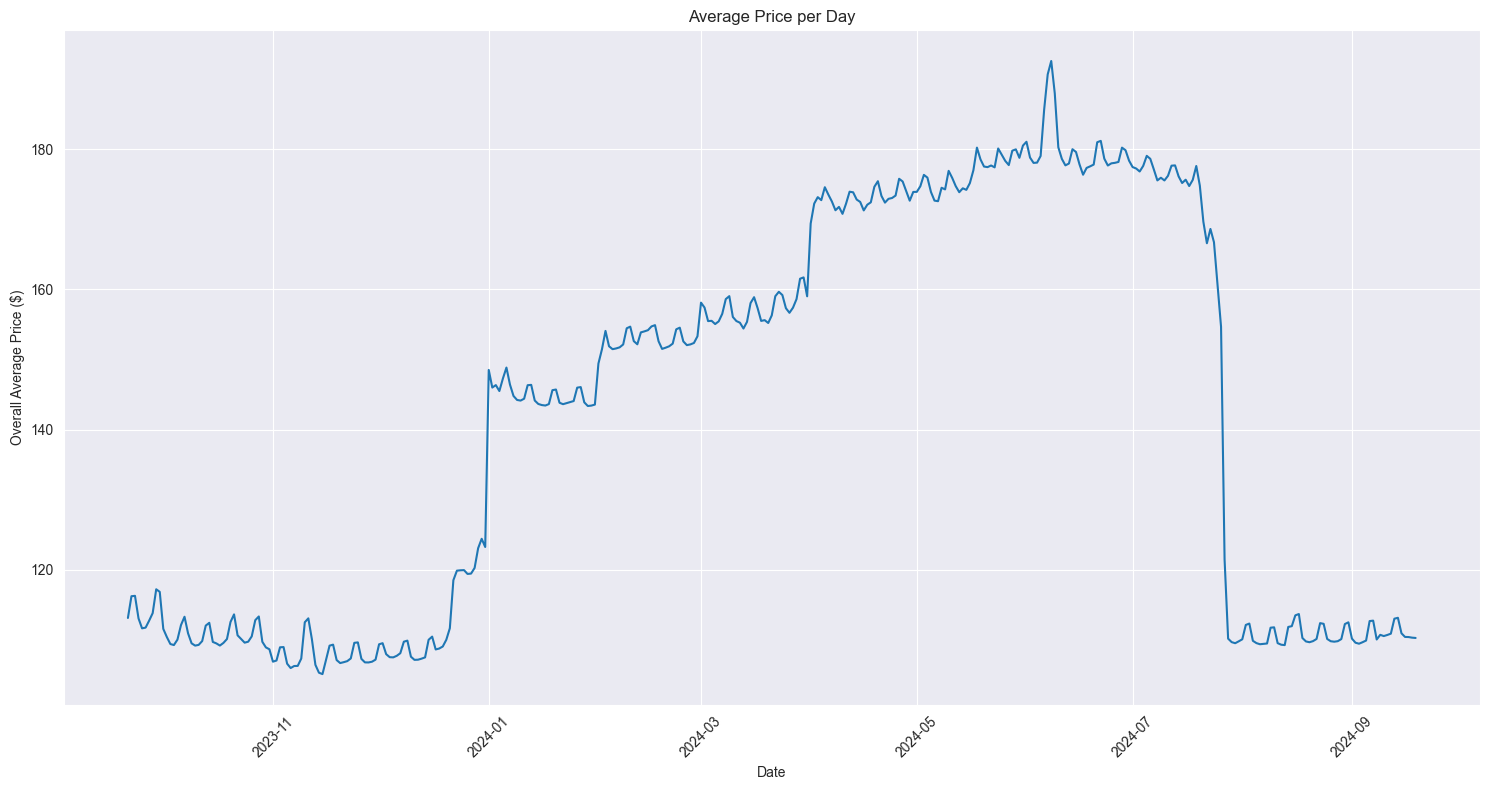

In [30]:
# Create the plot
plt.figure(figsize=(15, 8))

# We use a line plot as it is more appropriate for this case
sns.lineplot(x='date', y='price', data=average_price_per_day_df, errorbar=None)
plt.title('Average Price per Day')
plt.xlabel('Date')
plt.ylabel('Overall Average Price ($)')
plt.grid(True)
# Set the x-axis to display the dates in a readable format
plt.xticks(rotation=45)
# Set the y-axis to start from 0
plt.tight_layout()
plt.show()

### We can see that the average price per day is highly volatile, with a lot of spikes.

The average price per day is the highest in the summer months, and lowest in the winter months.
However, what seems odd is that the prices drop significantly in the middle of the summer to the end of the summer, which is the peak season for tourism in Athens.


Also, if we did the same analysis for the adjusted price, we would see the same outcome, as we can see below.

In [31]:
average_adjusted_price_per_day_df = calendar.groupby('date')['adjusted_price'].mean().round(3).reset_index()

# Displaying the first few rows of the resulting DataFrame
average_adjusted_price_per_day_df

,date,adjusted_price
0,2023-09-21,109.877
1,2023-09-22,112.868
2,2023-09-23,113.255
3,2023-09-24,110.520
4,2023-09-25,109.969
...,...,...
360,2024-09-15,109.345
361,2024-09-16,108.826
362,2024-09-17,108.807
363,2024-09-18,108.714


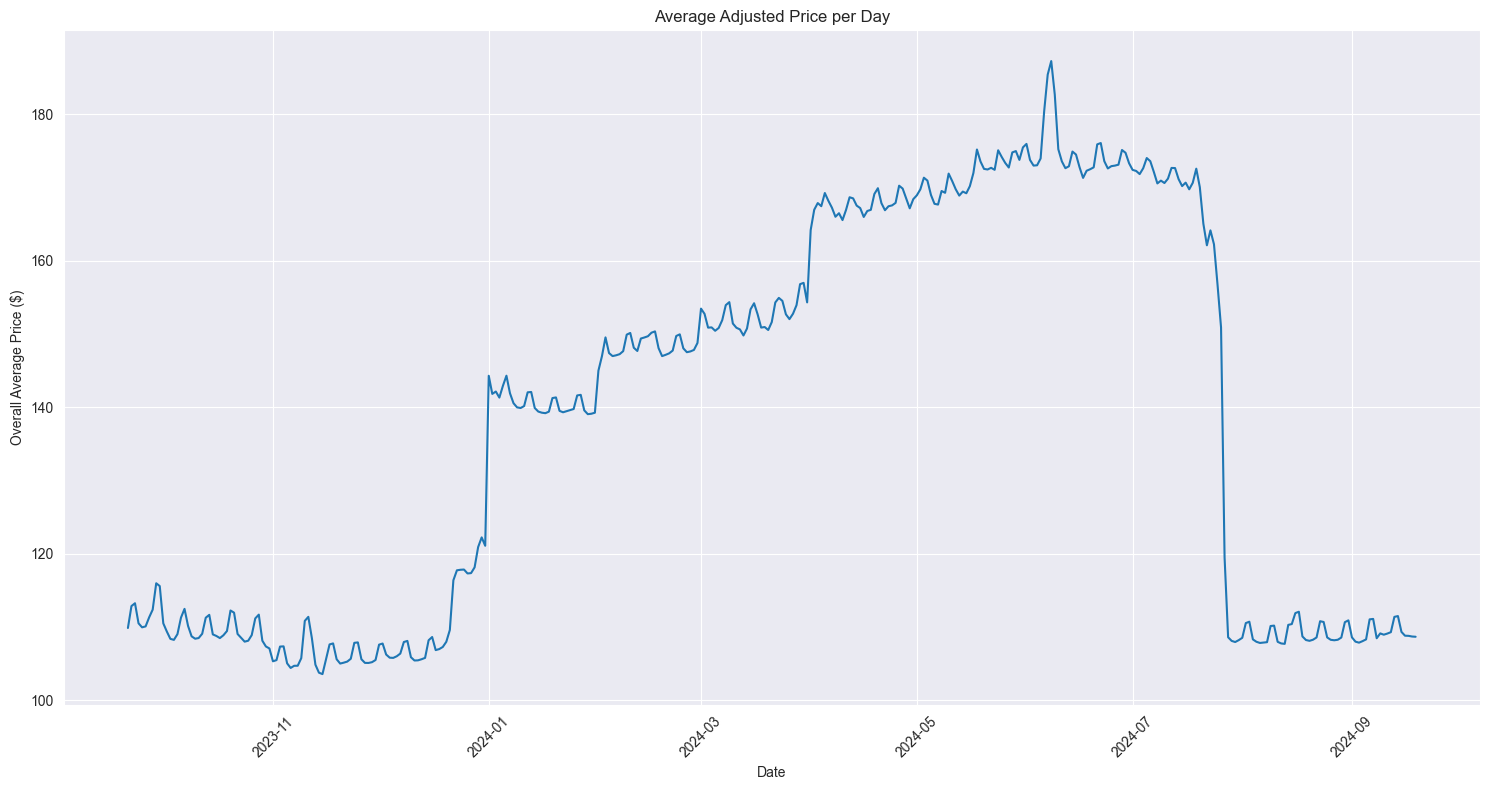

In [32]:
# Create the plot
plt.figure(figsize=(15, 8))

# We use a line plot as it is more appropriate for this case
sns.lineplot(x='date', y='adjusted_price', data=average_adjusted_price_per_day_df, errorbar=None)
plt.title('Average Adjusted Price per Day')
plt.xlabel('Date')
plt.ylabel('Overall Average Price ($)')
plt.grid(True)
# Set the x-axis to display the dates in a readable format
plt.xticks(rotation=45)
# Set the y-axis to start from 0
plt.tight_layout()
plt.show()

### We can also plot the average price per day when the outliers have been detected with the use of the Z-score method and therefore handled.

Except this time, we will use the **imputation** method for the handling of the outliers, which is to replace the outliers with the median value of the column,
as it is more appropriate for this case, because we want to preserve the data as much as possible, and the median value is not affected by the outliers.

In [33]:
# We replace the outliers of 'calendar' with the median value this time
calendar_no_outliers = calendar.copy()
calendar_no_outliers.loc[outliers_calendar, 'price'] = calendar_no_outliers.loc[~outliers_calendar, 'price'].median()

# We group the data by 'listing_id' and 'date' to calculate the average price per listing per day and round to 3 decimal places
average_price_per_day_df_no_outliers = calendar_no_outliers.groupby('date')['price'].mean().round(3).reset_index()

# Displaying the first few rows of the resulting DataFrame
average_price_per_day_df_no_outliers

,date,price
0,2023-09-21,101.277
1,2023-09-22,104.381
2,2023-09-23,104.434
3,2023-09-24,101.215
4,2023-09-25,99.798
...,...,...
360,2024-09-15,108.218
361,2024-09-16,107.689
362,2024-09-17,107.671
363,2024-09-18,107.584


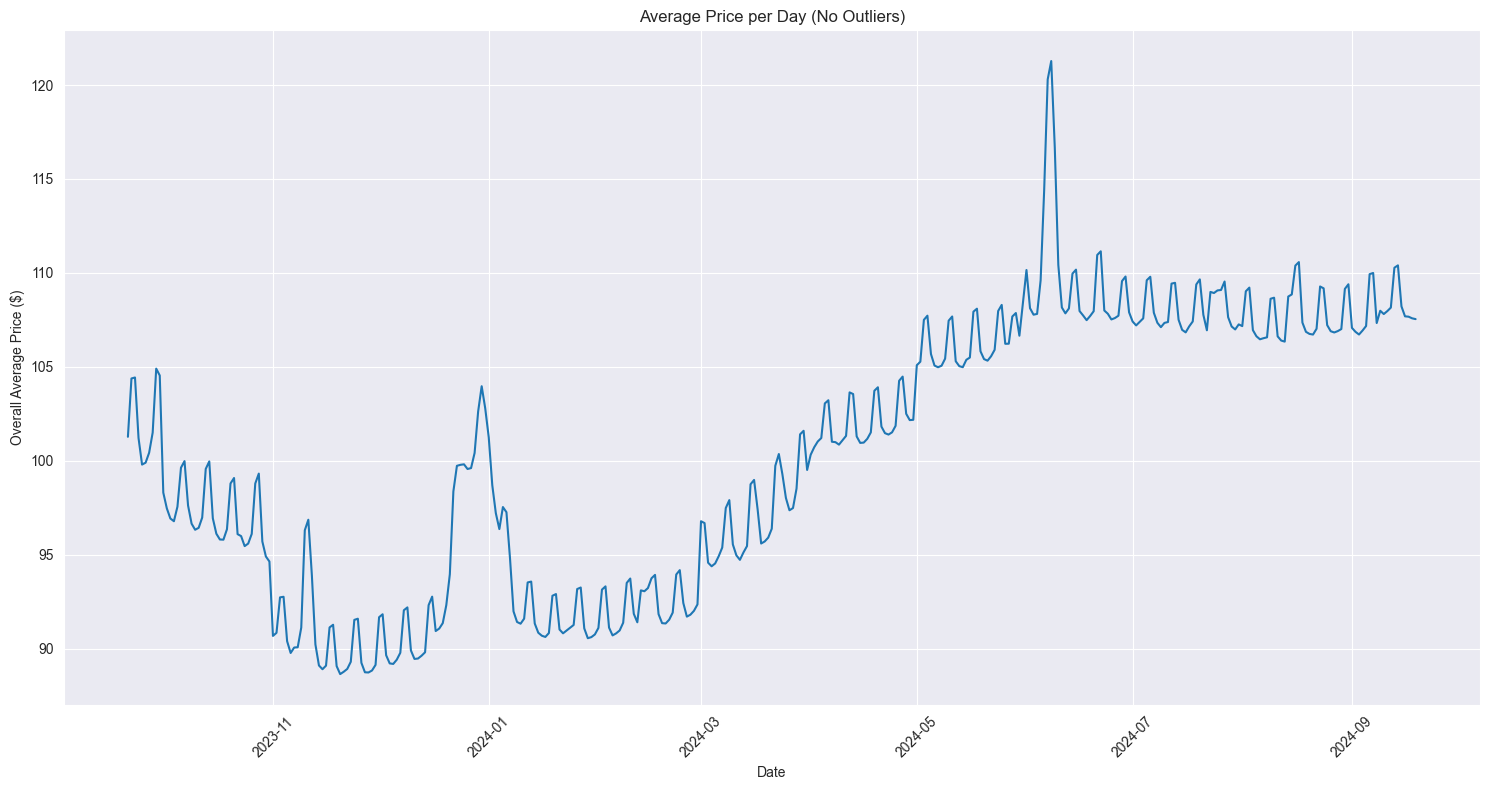

In [34]:
# Create the plot
plt.figure(figsize=(15, 8))

# We use a line plot as it is more appropriate for this case
sns.lineplot(x='date', y='price', data=average_price_per_day_df_no_outliers, errorbar=None)
plt.title('Average Price per Day (No Outliers)')
plt.xlabel('Date')
plt.ylabel('Overall Average Price ($)')
plt.grid(True)
# Set the x-axis to display the dates in a readable format
plt.xticks(rotation=45)
# Set the y-axis to start from 0
plt.tight_layout()
plt.show()

### With the outliers now adjusted, we can see that the average price per day is still highly volatile, with a lot of spikes.

**However**, the average price per day is now more stable (compared to the previous graph),
 with the prices not dropping significantly in the middle of the summer to the end of the summer, 
 which is the peak season for tourism in Athens, 
which makes sense and was expected, and in the winter months the prices are lower, which is also reasonable.
Moreover, we can better see the prices below 100 dollars, which were not easily visible before.

**Side note**: If we did the same analysis for the adjusted price, we would see the same outcome.

## (7) Listings per Host

We want a table with the number of listings per host, in descending order. Create a graph that will show the distribution of listings per host, as follows:

* We will rank the host on a number of listings basis. So, the first host will be the one with the largest number of listings, the second host will be the one with the second-largest number of listings, etc. If there is a number of hosts with the same listings, just add them in sequence. For instance, if there are 10 hosts with one listing each, add them in the ranking with any order between them.

* On the $y$ axis you will have the number of listings.

That is, a point $(x, y)$ will mean that the $x$-th highest hosting has $y$ listings.

After we have drawn the plot, we will do another one, this time with the $x$ axis in *logarithmic* scale.

### First, we will create a table with the number of listings per host, in descending order.

For this case, we will use the `listings` data. We will group the data by `host_id` and count the number of listings per host. 
We will then sort the hosts in descending order. 
We may already have the number of listings per host in the `host_listings_count` column, but it's calculated in a different way (from AirBnb).

We will calculate the number of listings per host in our own to be sure that we have the correct data and the data are only about Athens.

In [35]:
# We group the data by 'host_id' and count the number of listings per host 
listings_per_host = listings.groupby('host_id')['id'].count().reset_index(name='host_listings_count').sort_values(
    by='host_listings_count',
    ascending=False)
listings_per_host

,host_id,host_listings_count
607,20104194,114
2069,113548208,88
1811,90390850,78
60,748818,74
1149,47267002,61
...,...,...
2242,130728079,1
2241,130646248,1
2240,130612477,1
2239,130551473,1


### Now, we will draw a graph that will show the distribution of listings per host.

We will place each host in the $x$ axis based on the rank of the host 
(the host with the most listings will be placed first, the host with the second-most listings will be placed second, etc.),
 with the `range` function.

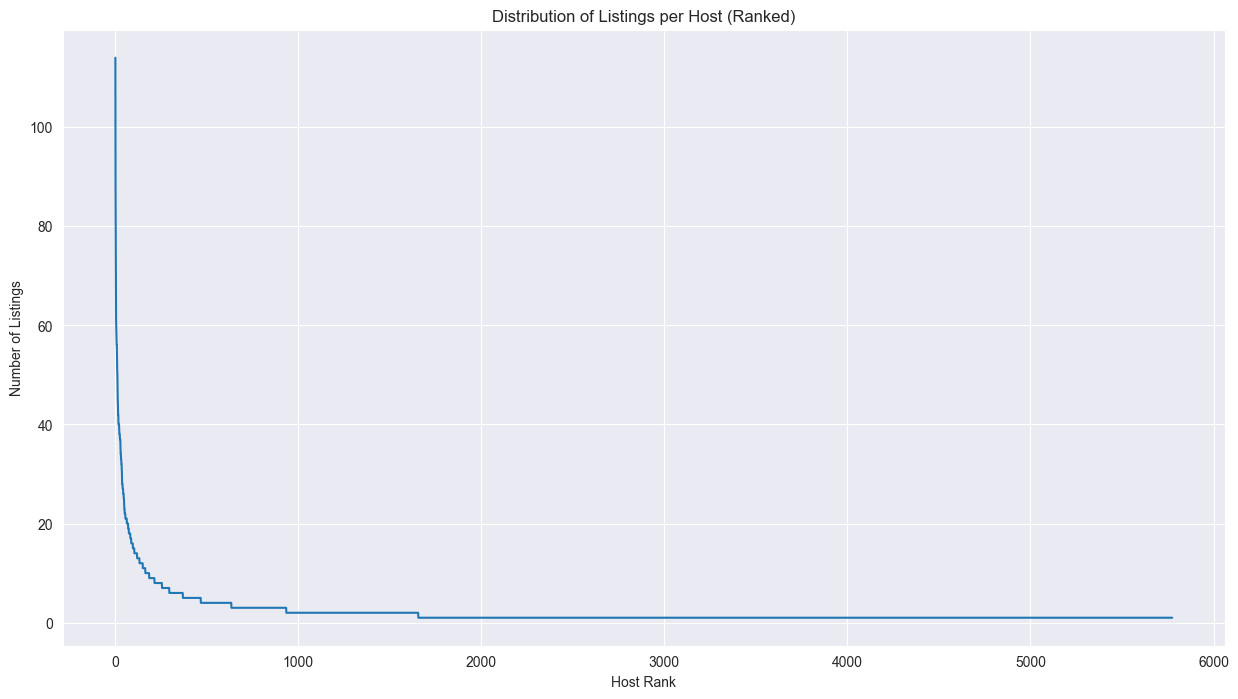

In [36]:
# Create the graph based on the sorted data
plt.figure(figsize=(15, 8))
# We will do a line plot as it is more appropriate for this case
# We also take into account the rank of the host and if the host has the same number of listings as the previous host we add 1 to the rank
sns.lineplot(x=range(1, len(listings_per_host) + 1), y='host_listings_count', data=listings_per_host)
plt.title('Distribution of Listings per Host (Ranked)')
plt.xlabel('Host Rank')
plt.ylabel('Number of Listings')
plt.show()

### And finally, we will draw another graph, this time with the $x$ axis in *logarithmic* scale.

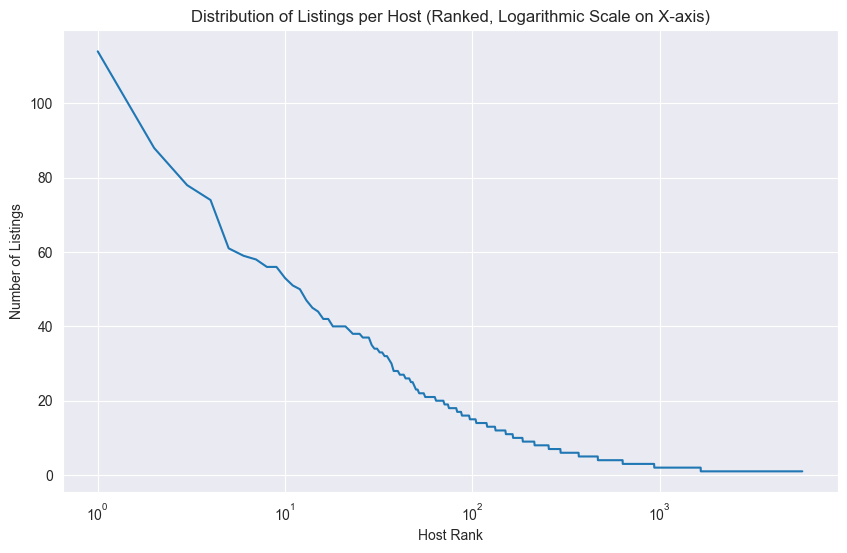

In [37]:
# Create the graph with x-axis in logarithmic scale
plt.figure(figsize=(10, 6))
# We again do a line plot as it makes the distribution more readable
sns.lineplot(x=range(1, len(listings_per_host) + 1), y='host_listings_count', data=listings_per_host)
# Set the x-axis to logarithmic scale
plt.xscale('log')
plt.title('Distribution of Listings per Host (Ranked, Logarithmic Scale on X-axis)')
plt.xlabel('Host Rank')
plt.ylabel('Number of Listings')
plt.show()

The logarithmic scale on the $x$ axis makes the distribution more readable and shows the distribution more clearly.
The original graph is  included for comparison, and as we can see that the distribution is not clear at all.

We can see that the distribution is highly skewed, with a few hosts having a large number of listings and most hosts having a small number of listings,
showing that most hosts have only a small number of listings.

## (8) Visualize Listings

We will draw an interactive map to show the listings overlayed on Athens.

We will use the [folium](https://github.com/python-visualization/folium) library to create our map

The map should show each listing and on clicking on top of it, the user should see a short description of the listing.

Note that such a map is heavy on resources. We will probably *not* be able to include it in a Jupyter notebook, so we will save it to an external HTML file that can be opened by any browser. Also, to make things easier, we will limit the maximum zoom level from 12 to 15



### We will use the `neighbourhoods.geojson` file to get the boundaries of the neighbourhoods in Athens.

This file contains the boundaries of the neighbourhoods in Athens in GeoJSON format.

We will create a map centered on Athens, with a zoom level of 12. 
We will also set the minimum and maximum latitude and longitude values to the bounds of the GeoJSON layer, 
so that the map is centered on Athens and the user cannot move the map outside of Athens. 
We will also set the maximum zoom level to 15 and the `maxBoundsViscosity` to 1.0, so that the map bounces back when zooming out.

**Note** : We create the map this way for performance reasons. 
For example, if we don't set the `maxBoundsViscosity` to 1.0, the map will be very slow when zooming out,

In [38]:
# Create a map centered on Athens

# Get the bounds of the GeoJSON layer
bounds = neighbourhoods_gdf.geometry.bounds

# Get the minimum and maximum latitude and longitude values
min_lat = bounds.miny.min()
max_lat = bounds.maxy.max()
min_lon = bounds.minx.min()
max_lon = bounds.maxx.max()

# Create the map
athens_map = folium.Map(location=[37.983810, 23.727539],  # Athens coordinates
                        zoom_start=12,
                        min_zoom=12,
                        max_zoom=15,
                        min_lat=min_lat,
                        max_lat=max_lat,
                        min_lon=min_lon,
                        max_lon=max_lon,
                        max_bounds=True,
                        maxBoundsViscosity=1.0  # Makes the map bounce back when zooming out
                        )

After we have created the map, we will add the GeoJSON layer with the neighbourhoods.
More specifically, we will calculate the convex hull of the area of Athens and add it as a new GeoJSON layer.

In [39]:
# Calculate the convex hull
convex_hull = neighbourhoods_gdf.unary_union.convex_hull

# Create a new GeoDataFrame with the convex hull and set its CRS to EPSG:4326 just to be sure
convex_hull_gdf = gpd.GeoDataFrame({'geometry': [convex_hull]}, crs="EPSG:4326")

# Add the convex hull as a new GeoJSON layer
folium.GeoJson(convex_hull_gdf,
               style_function=lambda x: {'color': 'green', 'fillColor': 'green', 'fillOpacity': 0.2}).add_to(athens_map)

Once we have added the GeoJSON layer, we will prepare the data for the markers.

First, we will sort the data by `id` so that the markers are added in the correct order.
Second, we will convert the `name`, `host` and `neighbourhood_cleansed` columns to strings so that they can be displayed in the popup without any problems.

An extra feature of this map will be to show the price of each listing for today's date (each time the map is created) in the popup.

We will filter the `calendar` dataframe for today's date and rename the `price` column to `today_price` to avoid confusion.
Then, we will merge the `calendar` dataframe with the `listings` dataframe on the `id`/`listing_id` fields.
Finally, we will add a `$` sign in front of the price.

In [40]:
# Make sure the data is sorted by 'id' so that the markers are added in the correct order
listings = listings.sort_values(by='id')

# Convert the 'name', 'host' and 'neighbourhood_cleansed' columns to strings so that they can be displayed in the popup without any problems
listings['name'] = listings['name'].astype(str)
listings['host_name'] = listings['host_name'].astype(str)
listings['neighbourhood_cleansed'] = listings['neighbourhood_cleansed'].astype(str)

# Get the current date
today_date = datetime.now().strftime('%Y-%m-%d')

# Filter the calendar DataFrame for today's date
calendar_today = calendar[calendar['date'] == today_date][['listing_id', 'available', 'price']]
# Rename the price column to 'today_price' to avoid confusion
calendar_today = calendar_today.rename(columns={'price': 'today_price'})

# Merge calendar_today with the listings DataFrame on the 'id'/'listing_id' fields
listings = pd.merge(listings, calendar_today, left_on='id', right_on='listing_id', how='left')

# Add a '$' sign in front of the price
listings['today_price'] = '$' + listings['today_price'].astype(str)

Then, we will add a marker for each listing. The marker will contain the `name`, `host name`, `neighbourhood` and `today's price` of the listing in the popup.

As an extra feature, we will also color the markers based on availability. If the listing is available, the marker will be green, otherwise it will be red.
The color of the marker will be determined by the `available` column of the `calendar` dataframe for today's date each time the map is created.
Lastly, the price of the listing that will be displayed in the popup will be the price of the listing for today's date, which will be determined by the `price` column of the `calendar` dataframe for today's date each time the map is created.

In [41]:
# Add a marker for each listing through iteration
for index, row in listings.iterrows():
    # Create the popup for the marker

    # We add the name, host name, neighbourhood and today's price of the listing in the popup with html tags
    html = ('<b>Name:</b> ' + row['name'] + '<br>' + '<b>Host Name:</b> '
            + row['host_name'] + '<br>' + '<b>Neighbourhood:</b> '
            + row['neighbourhood_cleansed'] + '<br>' + '<b>Price:</b> ' + row['today_price'])

    popup = folium.Popup(html=html, max_width=300, min_width=300)

    # Determine the color based on availability
    marker_color = 'green' if row['available'] == 't' else 'red'

    # Create the marker
    marker = folium.CircleMarker((row['latitude'], row['longitude']), popup=popup,
                                 radius=3,  # Control the size of the circle
                                 fill=True,  # Fill the circle
                                 color=marker_color,  # Color of the circle
                                 fill_opacity=0.6)
    # Add the marker to the map
    marker.add_to(athens_map)

# Get the bounds of the GeoJSON layer and fit the map to those bounds
athens_map.fit_bounds([[bounds.miny.min(), bounds.minx.min()], [bounds.maxy.max(), bounds.maxx.max()]])

# Save the map to an external HTML file
athens_map.save('athens_map.html')

### We can see the map in the `athens_map.html` file.

---